## Project Title: Telecommunication Customer Churn Prediction

## Introduction: 
Customer churn, also knows as customer turnover or customer defection. The situation refers to loss of customers. 
Churn is expensive and it cost more to acquiring a new customer than it does to retain a current one. For this very reason, there is the motivation to predict it before it happens. 

A giant Telecommunication company in Senegal wants to predict which customers are at high risk of leaving the company or canceling a subscription to a service, based on their behavior towards key products of the company. 

In this project, Machine Learning Models will be used to predict the future churn rate for the company. This will help to focus attention on customer retention programs to avert or minimize future churn.

## Hypothesis

1. Customers with longer tenure are less likely to churn than those with short tenure.

2. Customers with lesser income are likely to churn than those who have higher

3. Customers are more likely to switch to a network that offer better call plan to call other networks.

4. Customers who patronize a particular plan or service are most likely to churn. 

## Import Libraries

In [1]:
#importing packages
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline

## Load Data

In [2]:
train = pd.read_csv(r"C:\Users\Nathaniel Havim\Desktop\Capstone_project\Data\Train.csv")
test = pd.read_csv(r"C:\Users\Nathaniel Havim\Desktop\Capstone_project\Data\Test.csv")

df = train

## Exploratory Data Analysis: EDA
Here is the section to inspect the datasets in depth, present it, make hypotheses and think the cleaning, processing and features creation

In [3]:
print(df.head())

                                    user_id       REGION        TENURE  \
0  7ee9e11e342e27c70455960acc80d3f91c1286d1        DAKAR  K > 24 month   
1  50443f42bdc92b10388fc56e520e4421a5fa655c          NaN  K > 24 month   
2  da90b5c1a9b204c186079f89969aa01cb03c91b2          NaN  K > 24 month   
3  364ec1b424cdc64c25441a444a16930289a0051e  SAINT-LOUIS  K > 24 month   
4  d5a5247005bc6d41d3d99f4ef312ebb5f640f2cb        DAKAR  K > 24 month   

   MONTANT  FREQUENCE_RECH  REVENUE  ARPU_SEGMENT  FREQUENCE  DATA_VOLUME  \
0  20000.0            47.0  21602.0        7201.0       52.0       8835.0   
1      NaN             NaN      NaN           NaN        NaN          NaN   
2      NaN             NaN      NaN           NaN        NaN          NaN   
3   7900.0            19.0   7896.0        2632.0       25.0       9385.0   
4  12350.0            21.0  12351.0        4117.0       29.0       9360.0   

   ON_NET  ORANGE   TIGO  ZONE1  ZONE2 MRG  REGULARITY  \
0  3391.0   396.0  185.0    NaN   

In [4]:
print(test.head())

                                    user_id       REGION         TENURE  \
0  51fe4c3347db1f8571d18ac03f716c41acee30a4        MATAM  I 18-21 month   
1  5ad5d67c175bce107cc97b98c4e37dcc38aa7f3e          NaN   K > 24 month   
2  5a4db591c953a8d8f373877fad37aaf4268899a1          NaN   K > 24 month   
3  8bf9b4d8880aeba1c9a0da48be78f12e629be37c          NaN   K > 24 month   
4  c7cdf2af01e9fa95bf498b68c122aa4b9a8d10df  SAINT-LOUIS   K > 24 month   

   MONTANT  FREQUENCE_RECH  REVENUE  ARPU_SEGMENT  FREQUENCE  DATA_VOLUME  \
0   2500.0             5.0   2500.0         833.0        5.0          0.0   
1      NaN             NaN      NaN           NaN        NaN          NaN   
2      NaN             NaN      NaN           NaN        NaN          0.0   
3      NaN             NaN      NaN           NaN        NaN          NaN   
4   5100.0             7.0   5637.0        1879.0       15.0       7783.0   

   ON_NET  ORANGE  TIGO  ZONE1  ZONE2 MRG  REGULARITY               TOP_PACK  \
0    6

In [5]:
# Check dataset dimension 
print("Number of rows:", df.shape[0])
print("Number of columns:", df.shape[1])

Number of rows: 1077024
Number of columns: 19


In [6]:
print('number of row:',test.shape[0])
print('Number of column:',test.shape[1])

number of row: 190063
Number of column: 18


In [7]:
# print data types
print(df.dtypes)

user_id            object
REGION             object
TENURE             object
MONTANT           float64
FREQUENCE_RECH    float64
REVENUE           float64
ARPU_SEGMENT      float64
FREQUENCE         float64
DATA_VOLUME       float64
ON_NET            float64
ORANGE            float64
TIGO              float64
ZONE1             float64
ZONE2             float64
MRG                object
REGULARITY          int64
TOP_PACK           object
FREQ_TOP_PACK     float64
CHURN               int64
dtype: object


In [8]:
print(test.dtypes)

user_id            object
REGION             object
TENURE             object
MONTANT           float64
FREQUENCE_RECH    float64
REVENUE           float64
ARPU_SEGMENT      float64
FREQUENCE         float64
DATA_VOLUME       float64
ON_NET            float64
ORANGE            float64
TIGO              float64
ZONE1             float64
ZONE2             float64
MRG                object
REGULARITY          int64
TOP_PACK           object
FREQ_TOP_PACK     float64
dtype: object


In [9]:
# Drop the User_id column
df.drop('user_id', axis=1, inplace=True)

In [10]:
test.drop('user_id', axis=1, inplace=True)

In [11]:
df['TENURE'].value_counts()

K > 24 month     1021853
I 18-21 month      22494
H 15-18 month      12913
G 12-15 month       7520
J 21-24 month       6324
F 9-12 month        4604
E 6-9 month          929
D 3-6 month          387
Name: TENURE, dtype: int64

In [12]:
df['REGULARITY'].value_counts()

1     97779
62    83524
2     59172
3     43102
4     34241
      ...  
34     9731
37     9666
33     9653
35     9649
36     9573
Name: REGULARITY, Length: 62, dtype: int64

### Perform descriptive statistics on the dataset

In [13]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
MONTANT,699139.0,5529.210895,7104.737952,20.0,1000.0,3000.0,7350.0,470000.0
FREQUENCE_RECH,699139.0,11.523756,13.261938,1.0,2.0,7.0,16.0,131.0
REVENUE,714669.0,5506.050798,7175.625010,1.0,1000.0,3000.0,7360.0,532177.0
ARPU_SEGMENT,714669.0,1835.355961,2391.870902,0.0,333.0,1000.0,2453.0,177392.0
FREQUENCE,714669.0,13.974439,14.687059,1.0,3.0,9.0,20.0,91.0
DATA_VOLUME,547261.0,3368.801722,12898.928039,0.0,0.0,258.0,2905.0,1702309.0
ON_NET,683850.0,277.065798,874.315378,0.0,5.0,27.0,156.0,50809.0
ORANGE,629880.0,95.160804,203.020261,0.0,7.0,29.0,99.0,12040.0
TIGO,432250.0,23.105018,64.035464,0.0,2.0,6.0,20.0,4174.0
ZONE1,84898.0,8.167483,39.245883,0.0,0.0,1.0,3.0,2507.0


In [14]:
test.describe().T

,count,mean,std,min,25%,50%,75%,max
MONTANT,123695.0,5506.547759,7063.107301,25.0,1000.0,3000.0,7300.0,201500.0
FREQUENCE_RECH,123695.0,11.483940,13.181700,1.0,2.0,7.0,16.0,120.0
REVENUE,126422.0,5486.233417,7130.567766,1.0,1000.0,3000.0,7319.0,177322.0
ARPU_SEGMENT,126422.0,1828.750281,2376.852027,0.0,333.0,1000.0,2440.0,59107.0
FREQUENCE,126422.0,13.939670,14.623402,1.0,3.0,9.0,19.0,91.0
DATA_VOLUME,96716.0,3358.421151,12024.079200,0.0,0.0,265.0,2888.0,754798.0
ON_NET,120771.0,281.210613,886.496878,0.0,5.0,27.0,156.0,26786.0
ORANGE,111417.0,94.611639,202.594409,0.0,7.0,28.0,98.0,5695.0
TIGO,76555.0,22.952270,64.902240,0.0,2.0,6.0,20.0,3083.0
ZONE1,14850.0,8.135421,46.050513,0.0,0.0,1.0,3.0,3558.0


## Definition of Variables

**REGION**: The location of each client

**TENURE**: Duration with the network

**MONTANT**: Top-Up Amount

**FREQUENCE_RECH**: the number of times a customer refilled

**REVENUE**: Monthly income of each client

**ARPU_SEGMENT**: income over 90 days / 3

**FREQUENCE**: number of times the client has made an income.

**DATA_VOLUME**: number of connections

**ON_NET**: inter expresso call

**ORANGE**: calls to orange

**TIGO**: calls to tigo

**ZONE1**: calls to zone1

**ZONE2**: calls to zone2

**MRG**:a client who is going

**REGULARITY**: number of times the client is active for 90 days

**TOP_PACK**: the most active packs

**FREQ_TOP_PACK**: number of times the client has activated the top pack packages

**CHURN**: variable to predict - Target

In [15]:
# unique elements of MONTANT column
df.MONTANT.unique()

array([20000.,    nan,  7900., ..., 35475.,  6216.,  8949.])

In [16]:
# unique elements of REVENUE column
df.REVENUE.unique()

array([21602.,    nan,  7896., ..., 37609., 21676., 26489.])

In [17]:
# unique elements in TOP_PACK column
df.TOP_PACK.unique()

array(['On net 200F=Unlimited _call24H', nan, 'Data:490F=1GB,7d',
       'All-net 500F=2000F;5d', 'On-net 500=4000,10d',
       'Data:3000F=10GB,30d', 'Data:200F=Unlimited,24H',
       'IVR Echat_Daily_50F', 'Data:1000F=2GB,30d',
       'Mixt 250F=Unlimited_call24H', 'On-net 1000F=10MilF;10d',
       'MIXT:500F= 2500F on net _2500F off net;2d',
       'Data: 200 F=100MB,24H', 'All-net 600F= 3000F ;5d',
       'On-net 200F=60mn;1d', 'Twter_U2opia_Daily',
       'Data: 100 F=40MB,24H', 'All-net 500F =2000F_AllNet_Unlimited',
       'On net 200F= 3000F_10Mo ;24H', '200=Unlimited1Day', 'Jokko_Daily',
       'Data:1000F=5GB,7d', 'Data:700F=1.5GB,7d', 'All-net 1000=5000;5d',
       'Data:150F=SPPackage1,24H', 'IVR Echat_Monthly_500F',
       'VAS(IVR_Radio_Daily)', 'MIXT: 390F=04HOn-net_400SMS_400 Mo;4h\t',
       'MIXT: 200mnoff net _unl on net _5Go;30d', 'On-net 500F_FNF;3d',
       'MIXT: 590F=02H_On-net_200SMS_200 Mo;24h\t\t',
       'Data:1500F=3GB,30D', 'Data:300F=100MB,2d', 'Data:500F

### Univariate Analysis
This sction visualizes each individual feature in the dataset.

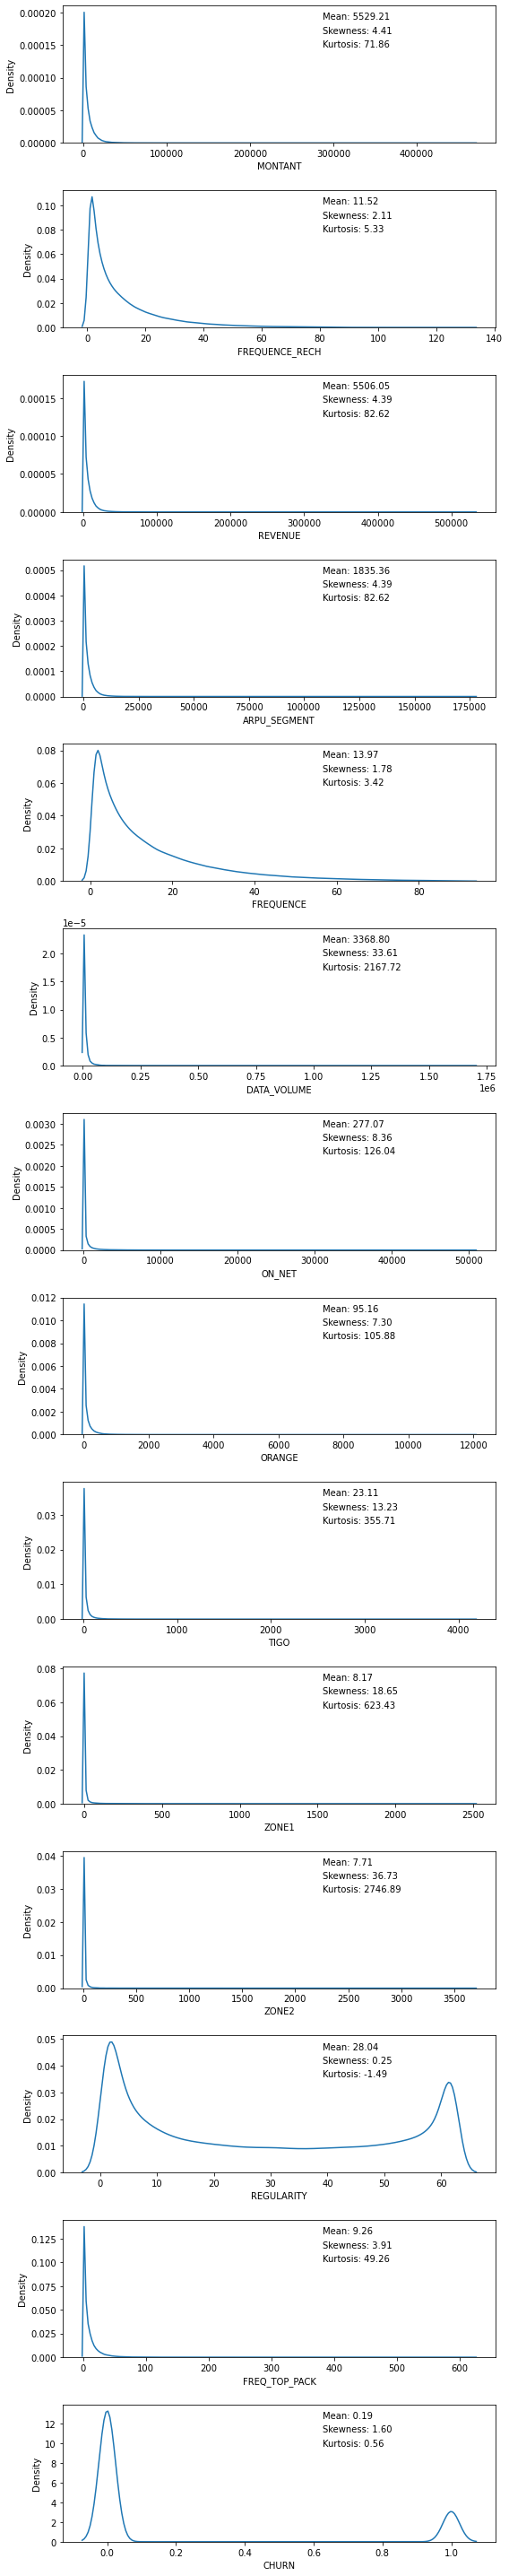

In [18]:
# Numerical columns
num_cols = df.select_dtypes(include=['int64','float64']).columns

# Plot KDEs(kernel density estimation) for all columns
fig, axes = plt.subplots(nrows=len(num_cols), figsize=(8, 40))
for i, col in enumerate(num_cols):
    sns.kdeplot(data=df, x=col, ax=axes[i])
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Density')
    
    # Calculate mean, skewness, and kurtosis
    mean_val = df[col].mean()
    skewness_val = df[col].skew()
    kurtosis_val = df[col].kurtosis()
    
    # Add mean, skewness, and kurtosis as text annotations
    axes[i].text(0.6, 0.9, f'Mean: {mean_val:.2f}', transform=axes[i].transAxes)
    axes[i].text(0.6, 0.8, f'Skewness: {skewness_val:.2f}', transform=axes[i].transAxes)
    axes[i].text(0.6, 0.7, f'Kurtosis: {kurtosis_val:.2f}', transform=axes[i].transAxes)
    
plt.tight_layout()
plt.show()

C:\Users\Nathaniel Havim\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 9 (	) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


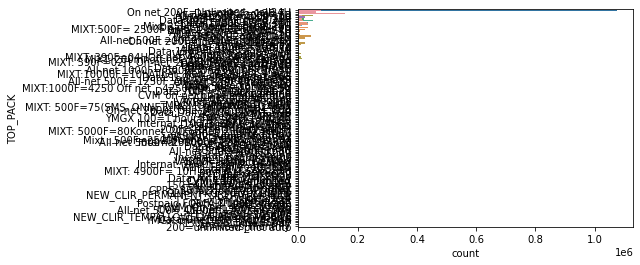

In [24]:
# Plot all categorical features
cat_cols = df.select_dtypes(include=['object'])
for column in cat_cols:
    sns.countplot(y=column, data=df)
    
plt.show()
    

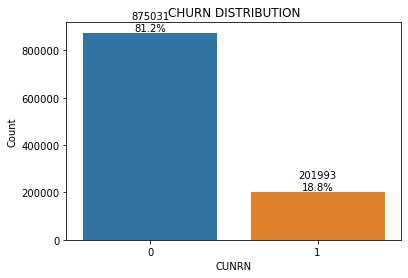

In [20]:
# Count plot for "CHURN"
sns.countplot(data=df, x='CHURN')

# Set labels
plt.xlabel('CUNRN')
plt.ylabel('Count')

# Set title
plt.title('CHURN DISTRIBUTION')

# Calculate percentage distribution
total = len(df['CHURN'])
percentages = df['CHURN'].value_counts(normalize=True) * 100

# Add data labels and percentage annotations
for p, percentage in zip(plt.gca().patches, percentages):
    count = p.get_height()
    percentage_label = f'{percentage:.1f}%'
    plt.gca().annotate(f'{count}\n{percentage_label}', (p.get_x() + p.get_width() / 2, p.get_height()), ha='center', va='bottom')


plt.show()


### Bivariate Analysis

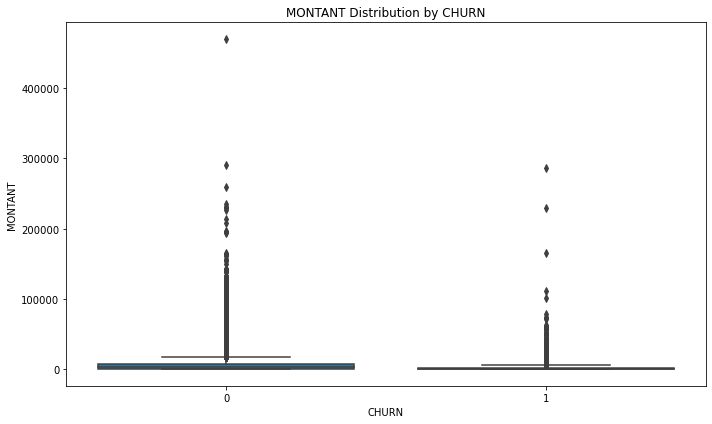

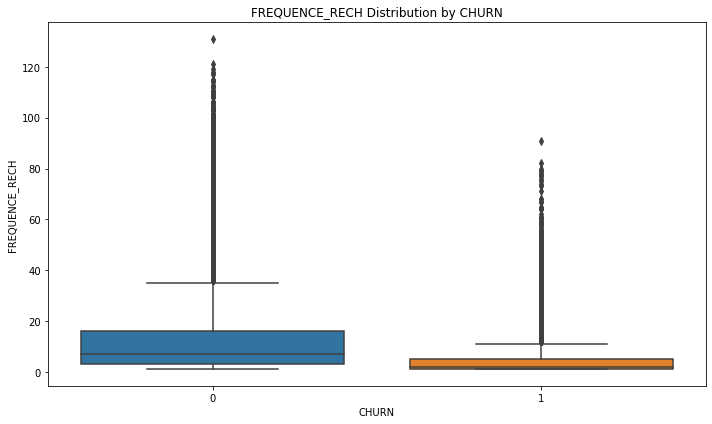

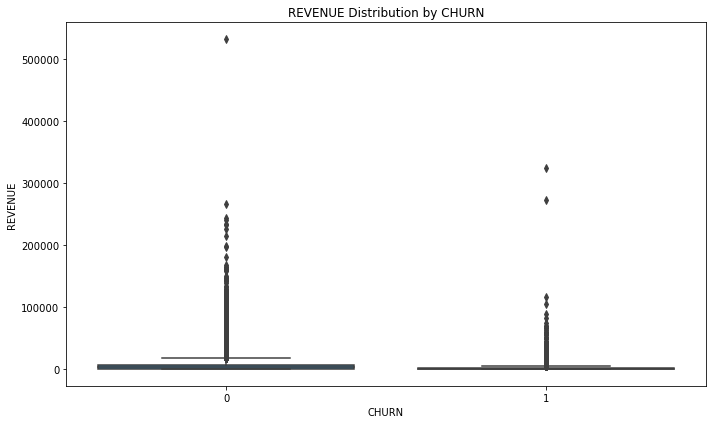

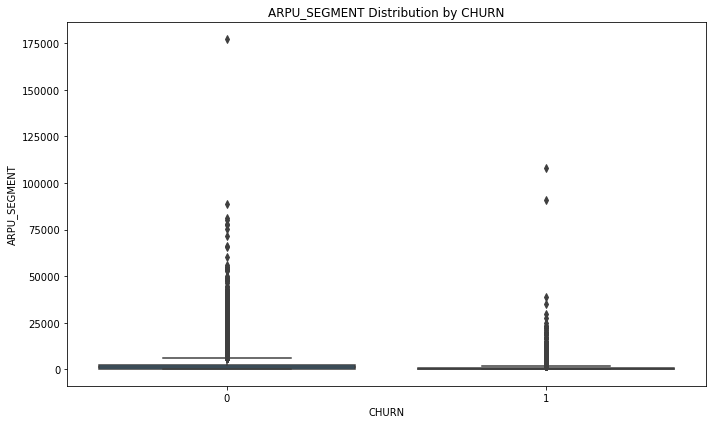

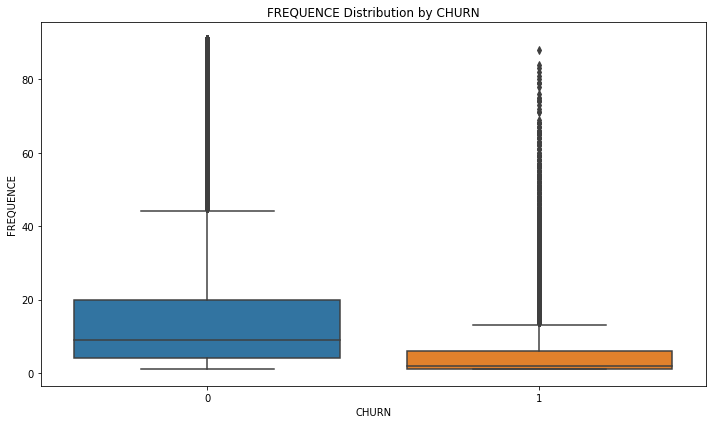

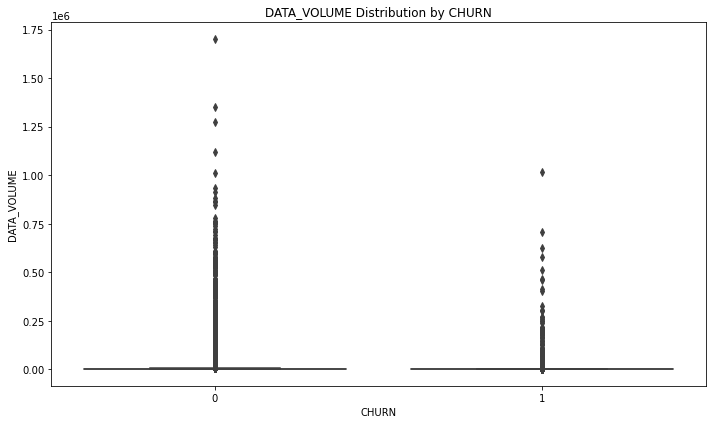

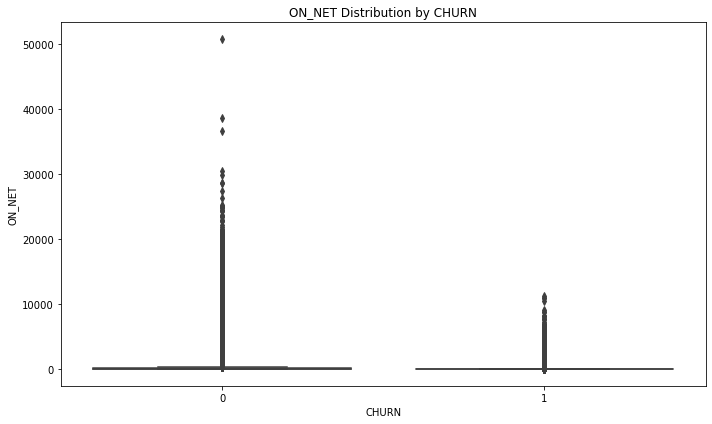

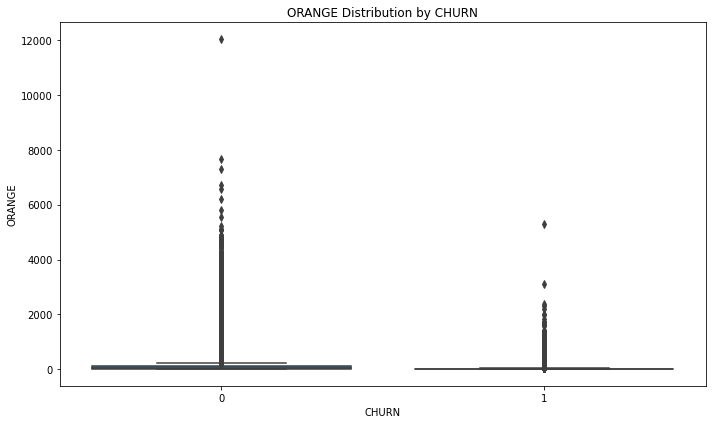

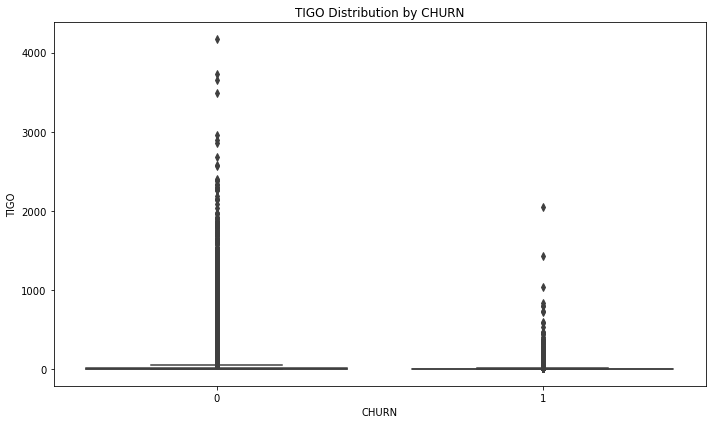

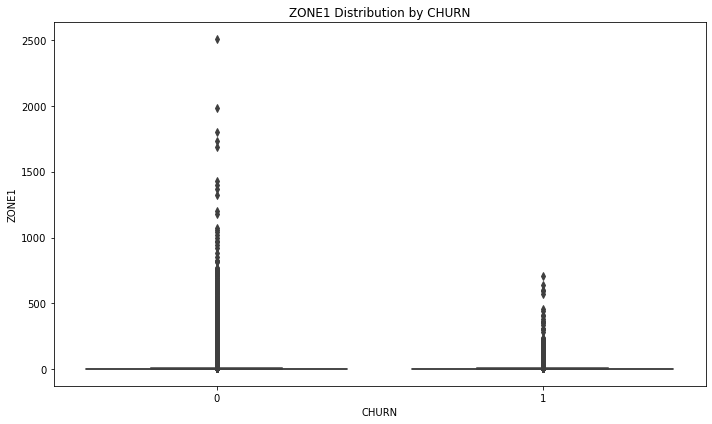

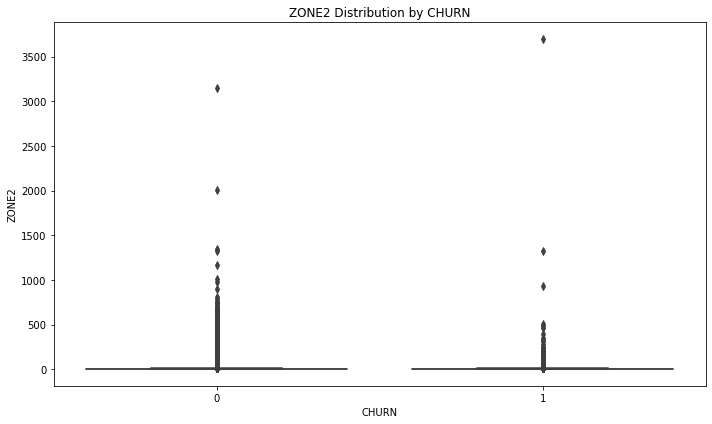

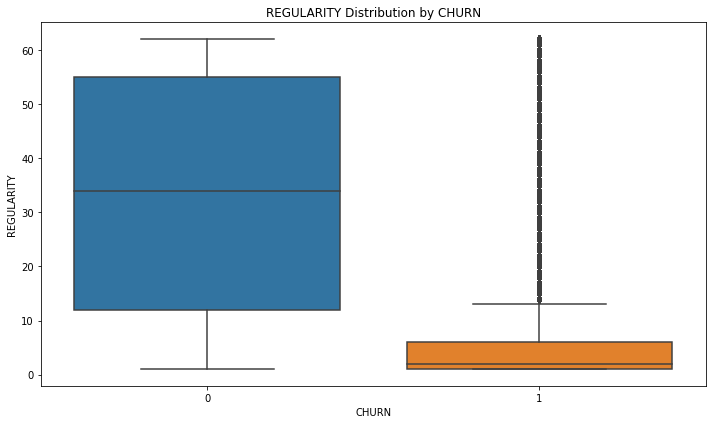

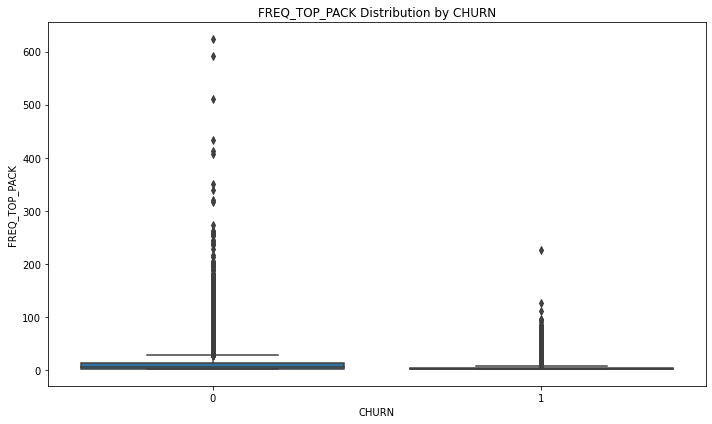

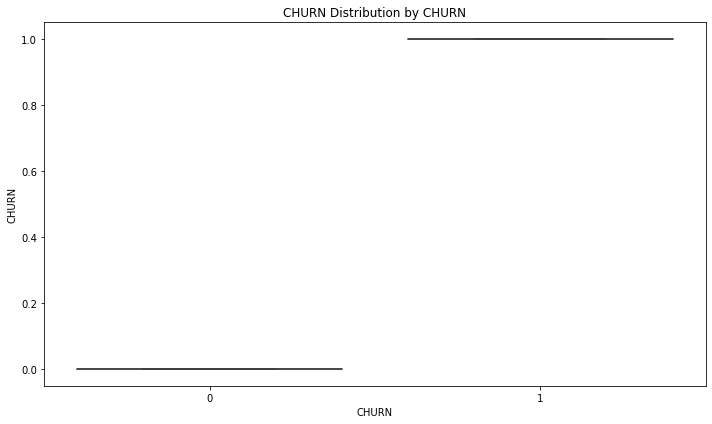

In [21]:
Num_var = df.select_dtypes(include=['int64','float64']).columns
for col in Num_var:
    plt.figure(figsize=(10, 6))
    sns.boxplot(data=df, x='CHURN', y=col)
    plt.xlabel('CHURN')
    plt.ylabel(col)
    plt.title(f'{col} Distribution by CHURN')
    
    plt.tight_layout()
    plt.show()

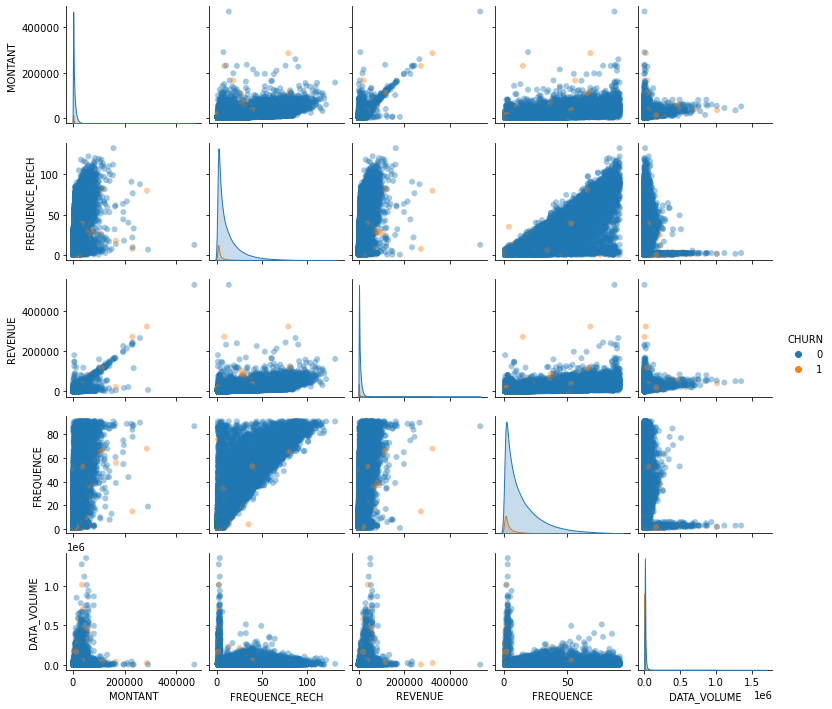

In [23]:
# Show pairplot
sns.pairplot(df[['MONTANT','FREQUENCE_RECH','REVENUE','FREQUENCE','DATA_VOLUME','CHURN']],hue='CHURN',
             plot_kws=dict(alpha=0.4, edgecolor='none'),height=2,aspect=1.1)

### Multivariate Analysis

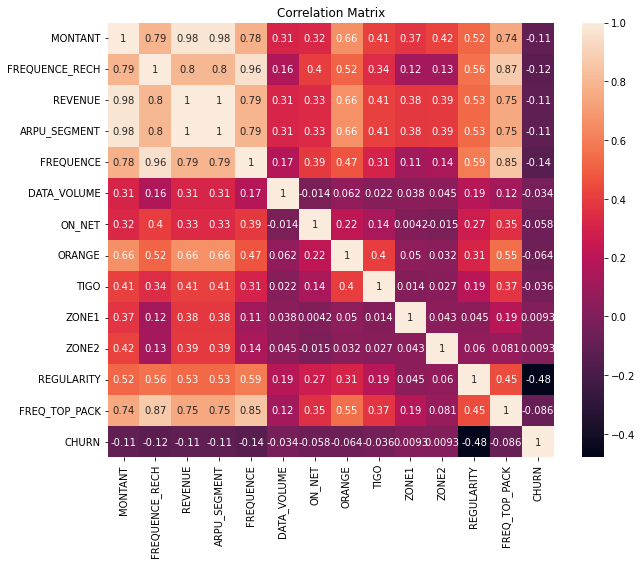

In [32]:
# Calculate correlation matrix
correl = df.corr()

# Create heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correl, annot=True)
plt.title('Correlation Matrix')
plt.show()

### Check for columns with missing values

In [35]:
df.isnull().sum()

REGION             424337
TENURE                  0
MONTANT            377885
FREQUENCE_RECH     377885
REVENUE            362355
ARPU_SEGMENT       362355
FREQUENCE          362355
DATA_VOLUME        529763
ON_NET             393174
ORANGE             447144
TIGO               644774
ZONE1              992126
ZONE2             1008230
MRG                     0
REGULARITY              0
TOP_PACK           450895
FREQ_TOP_PACK      450895
CHURN                   0
dtype: int64

In [36]:
test.isna().sum()

REGION             74733
TENURE                 0
MONTANT            66368
FREQUENCE_RECH     66368
REVENUE            63641
ARPU_SEGMENT       63641
FREQUENCE          63641
DATA_VOLUME        93347
ON_NET             69292
ORANGE             78646
TIGO              113508
ZONE1             175213
ZONE2             178052
MRG                    0
REGULARITY             0
TOP_PACK           79290
FREQ_TOP_PACK      79290
dtype: int64

### Chech for duplicate in the dataset and drop them.

In [ ]:
df.duplicated().sum()

In [ ]:
test.duplicated().sum()